## MPAA rating prediction

In [699]:
import pandas as pd
import numpy as np
import warnings
import re
import pickle
import seaborn as sns

%matplotlib inline
warnings.filterwarnings('ignore')

Import dataset :: using the rotten tomatoes dataset

In [700]:
dataset_df = pd.read_csv( './rtt_dataset/all_movie.csv' )
dataset_df = dataset_df[['Title', 'Rating', 'Description']]
dataset_df.columns = dataset_df.columns.str.strip()
dataset_df.head(4)

,Title,Rating,Description
0,The Mummy: Tomb of the Dragon Emperor,PG-13,The Fast and the Furious director Rob Cohen co...
1,The Masked Saint,PG-13,The journey of a professional wrestler who bec...
2,Spy Hard,PG-13,"Dead pan Leslie Nielsen stars as Dick Steele, ..."
3,Der Baader Meinhof Komplex (The Baader Meinhof...,R,Director Uli Edel teams with screenwriter Bern...


In [701]:
# finding unique mpaa rating in the dataset
dataset_df['Rating'].unique()

array(['PG-13 ', 'PG-13', 'R ', 'NR', 'PG', 'G', 'PG ', 'R', 'G ', 'NR ',
       'NC17', 'NC17 '], dtype=object)

In [702]:
# clean mpaa ratings
mpaa_fix = {
    'PG-13 ' : 'PG-13',
    'R ' : 'R',
    'PG ': 'PG',
    'G ' : 'G',
    'NR ': 'NR',
    'NC17 ': 'NC17'
}
for i, rating in dataset_df['Rating'].iteritems():
    if rating in mpaa_fix.keys():
        fix_val = mpaa_fix.get(rating)
        dataset_df.iloc[i]['Rating'] = fix_val

        

array(['PG-13', 'R', 'NR', 'PG', 'G', 'NC17'], dtype=object)

In [703]:
# Clean the movie description
def clean_description( text_str ):
    text = re.sub('[^a-zA-Z]',  ' ', text_str)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

cleaned_desc = []
for i, description in dataset_df['Description'].iteritems():
    cleaned_desc.append( clean_description( str(description) ) )

dataset_df['cleanedDescr'] = cleaned_desc
dataset_df.head(4)

,Title,Rating,Description,cleanedDescr
0,The Mummy: Tomb of the Dragon Emperor,PG-13,The Fast and the Furious director Rob Cohen co...,The Fast and the Furious director Rob Cohen co...
1,The Masked Saint,PG-13,The journey of a professional wrestler who bec...,The journey of professional wrestler who becom...
2,Spy Hard,PG-13,"Dead pan Leslie Nielsen stars as Dick Steele, ...",Dead pan Leslie Nielsen stars as Dick Steele a...
3,Der Baader Meinhof Komplex (The Baader Meinhof...,R,Director Uli Edel teams with screenwriter Bern...,Director Uli Edel teams with screenwriter Bern...


In [704]:
pickle.dump(dataset_df, open('./data/dataset_df_cleaned_n_sample_exceptNC17BiD.pkl', 'wb'))

In [705]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29810 entries, 0 to 29809
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         29810 non-null  object
 1   Rating        29810 non-null  object
 2   Description   29807 non-null  object
 3   cleanedDescr  29810 non-null  object
dtypes: object(4)
memory usage: 931.7+ KB


## Data Distribution

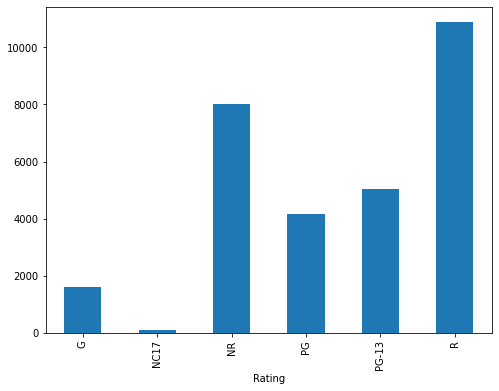

In [706]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
dataset_df.groupby('Rating')['cleanedDescr'].count().plot.bar(ylim=0)
plt.show()

In [707]:
## drop G, NC-17
dataset_df = dataset_df[dataset_df.Rating != 'NC17']

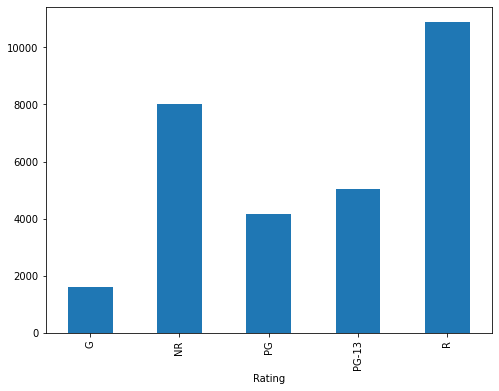

In [708]:
fig = plt.figure(figsize=(8,6))
dataset_df.groupby('Rating')['cleanedDescr'].count().plot.bar(ylim=0)
plt.show()

## Use same amount of labels : Balance class

In [709]:
PG_count = dataset_df[dataset_df.Rating == 'G'].shape
PG_count

(1606, 4)

In [710]:
dataset_df = dataset_df.sample(frac=1).groupby('Rating').head(1606)
dataset_df

,Title,Rating,Description,cleanedDescr
727,MacArthur,PG,Star Gregory Peck went into MacArthur dislikin...,Star Gregory Peck went into MacArthur dislikin...
26019,On Her Majesty's Secret Service,PG,Connery's decision to quit as Bond left Brocco...,Connery decision to quit as Bond left Broccoli...
23645,No Turning Back,R,After fate conspires to make a man into an out...,After fate conspires to make man into an outla...
1172,Cinderella Man,PG-13,The true story of an athlete who achieved his ...,The true story of an athlete who achieved his ...
12167,American Grindhouse,NR,Dive into the sordid history of American explo...,Dive into the sordid history of American explo...
...,...,...,...,...
14922,Seven Days in May,G,"In this film, General James M. Scott, convince...",In this film General James Scott convinced tha...
15667,Sunset Boulevard,G,Aging silent-film star Norma Desmond ensnares ...,Aging silent film star Norma Desmond ensnares ...
19127,Kit Kittredge: An American Girl,G,Producer Julia Roberts brings the American Gir...,Producer Julia Roberts brings the American Gir...
28309,"The 5,000 Fingers of Dr. T",G,"Ted Geisel, better known as Dr. Seuss, wrote a...",Ted Geisel better known as Dr Seuss wrote and ...


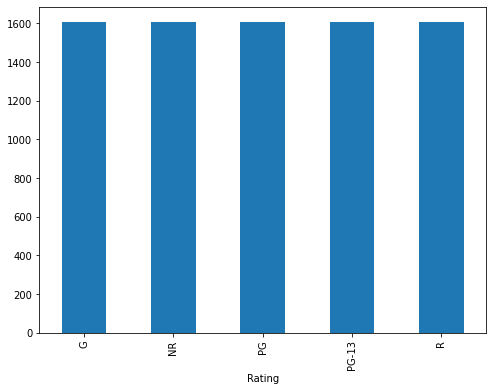

In [711]:
fig = plt.figure(figsize=(8,6))
dataset_df.groupby('Rating')['cleanedDescr'].count().plot.bar(ylim=0)
plt.show()

### Further clean the description

In [712]:
# !pip install nltk
# from nltk import word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

In [713]:
# REPLACE_WITH_SPACE = re.compile(r'[^A-Za-z\s]')
# stop_words = set(stopwords.words("english")) 
# lemmatizer = WordNetLemmatizer()
# def clean_description(raw_review: str) -> str:
#     # remove non letters
#     letters_only = REPLACE_WITH_SPACE.sub(" ", raw_review)
#     # convert to lowercase
#     lowercase_letters = letters_only.lower()
#     return lowercase_letters


# def lemmatize(tokens: list) -> list:
#     # lemmatize
#     tokens = list(map(lemmatizer.lemmatize, tokens))
#     lemmatized_tokens = list(map(lambda x: lemmatizer.lemmatize(x, "v"), tokens))
#     # remove stop words
#     meaningful_words = list(filter(lambda x: not x in stop_words, lemmatized_tokens))
#     return meaningful_words


# def preprocess(review: str):
#     # 1. Clean text
#     review = clean_description(review)
#     # 2. Split into individual words
#     #tokens = word_tokenize(review)
#     # 3. Lemmatize
#     #lemmas = lemmatize(tokens)
#     # 4. Join the words back into one string separated by space,
#     #print(review)
#     # and return the result.
#     return review

In [714]:
# cleaned_desc = []
# for i, description in dataset_df['cleanedDescr'].iteritems():
#     cleaned_desc.append(preprocess(description))

In [715]:
# dataset_df['cleanedDescr'] = cleaned_desc
# dataset_df.head(4)

In [716]:
# pickle.dump(dataset_df, open('./data/dataset_df_cleaned_n_sample_exceptNC17BiD_cleaned.pkl', 'wb'))

## Training model

In [717]:
# training_df = pickle.load( open('./data/dataset_df_cleaned_n_sample_exceptNC17BiD_cleaned.pkl', 'rb') )
training_df = pickle.load( open('./data/dataset_df_cleaned_n_sample_exceptNC17BiD.pkl', 'rb') )

In [718]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import one_hot, Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, LSTM, Embedding, GlobalMaxPooling1D, Bidirectional, Dropout
from keras import regularizers

In [719]:
_y = training_df['Rating']
encoder = LabelEncoder()
Y = encoder.fit_transform(_y)
Y

array([4, 4, 4, ..., 5, 4, 4])

In [720]:
X = training_df['cleanedDescr']
X

0        The Fast and the Furious director Rob Cohen co...
1        The journey of professional wrestler who becom...
2        Dead pan Leslie Nielsen stars as Dick Steele a...
3        Director Uli Edel teams with screenwriter Bern...
4        One of cluster of late films about the Vietnam...
                               ...                        
29805    Filmed at least nine times over the last nine ...
29806    Fred MacMurray stars in this Walt Disney comed...
29807    A resident of rd century Earth becomes involve...
29808    Supernova chronicles the search and rescue pat...
29809    For years there have been documented cases of ...
Name: cleanedDescr, Length: 29810, dtype: object

In [721]:
description_lengths = []
for i, description in training_df['cleanedDescr'].iteritems():
    description_lengths.append( len(description) )
max_description_length = np.mean( description_lengths )
max_description_length

729.3683998658169

## Train, test split

In [722]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=40 )

In [723]:
Y_train = to_categorical(Y_train)
Y_test  = to_categorical(Y_test)

In [724]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

In [725]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test  = tokenizer.texts_to_sequences(X_test)

In [726]:
vocabulary_size = len(tokenizer.word_index) + 1
vocabulary_size

56359

In [727]:
maxlen =  420 # Only concider first 400 words of each description

X_train = pad_sequences( X_train, maxlen=maxlen )
X_test  = pad_sequences( X_test, maxlen=maxlen )

## Use GloVe : Global Vectors for Word Representation
https://nlp.stanford.edu/projects/glove/

GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space. 

In [728]:
glove_file = open('./glove.6B/glove.6B.100d.txt', encoding='utf8')

In [729]:
embedd_dictionary = dict()
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dims = np.asarray(records[1:], dtype='float32')
    embedd_dictionary[word] = vector_dims

glove_file.close()

In [730]:
embedd_matrix = np.zeros((vocabulary_size, 100))
for word, index in tokenizer.word_index.items():
    embedd_vector = embedd_dictionary.get(word)
    if embedd_vector is not None:
        embedd_matrix[index] = embedd_vector
embedd_matrix.shape

(56359, 100)

In [731]:
output_dim = embedd_matrix.shape[1]
output_dim

100

## Build the NN Model

In [732]:
model = Sequential()
model.add(Embedding(input_dim=vocabulary_size, output_dim=output_dim, weights=[embedd_matrix], trainable=False))
model.add( Bidirectional(LSTM(units=128, recurrent_dropout=0)) )
model.add(Dropout(0.4))
model.add(Dense(64, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(6, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_43 (Embedding)     (None, None, 100)         5635900   
_________________________________________________________________
bidirectional_34 (Bidirectio (None, 256)               234496    
_________________________________________________________________
dropout_30 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_31 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_75 (Dense)             (None, 6)                 390       
Total params: 5,887,234
Trainable params: 251,334
Non-trainable params: 5,635,900
_____________________________________

In [733]:
import keras
callback = [
#     keras.callbacks.EarlyStopping(patience=2),
    keras.callbacks.ModelCheckpoint(filepath='./data/checkpoint/BDLSTM.{epoch:02d}-{val_loss:.2f}.h5', save_best_only=True ),
    keras.callbacks.TensorBoard(log_dir='./data/tf/logs'),
]

In [734]:
hist = model.fit(X_train, Y_train, batch_size=64, epochs=120, validation_data=(X_test, Y_test), verbose=1, callbacks=callback)

Epoch 1/120
327/327 [==============================] - 25s 70ms/step - loss: 2.1127 - accuracy: 0.3385 - val_loss: 1.4840 - val_accuracy: 0.4071
Epoch 2/120
327/327 [==============================] - 22s 68ms/step - loss: 1.4753 - accuracy: 0.4131 - val_loss: 1.3724 - val_accuracy: 0.4530
Epoch 3/120
327/327 [==============================] - 22s 67ms/step - loss: 1.3664 - accuracy: 0.4556 - val_loss: 1.2972 - val_accuracy: 0.4844
Epoch 4/120
327/327 [==============================] - 22s 67ms/step - loss: 1.3147 - accuracy: 0.4675 - val_loss: 1.2704 - val_accuracy: 0.4884
Epoch 5/120
327/327 [==============================] - 22s 68ms/step - loss: 1.2621 - accuracy: 0.4913 - val_loss: 1.2530 - val_accuracy: 0.4956
Epoch 6/120
327/327 [==============================] - 22s 68ms/step - loss: 1.2350 - accuracy: 0.5174 - val_loss: 1.2239 - val_accuracy: 0.5092
Epoch 7/120
327/327 [==============================] - 22s 68ms/step - loss: 1.1894 - accuracy: 0.5376 - val_loss: 1.2056 - val_ac

327/327 [==============================] - 22s 66ms/step - loss: 0.2022 - accuracy: 0.9825 - val_loss: 1.1606 - val_accuracy: 0.7988
Epoch 58/120
327/327 [==============================] - 22s 67ms/step - loss: 0.2294 - accuracy: 0.9716 - val_loss: 1.1397 - val_accuracy: 0.7983
Epoch 59/120
327/327 [==============================] - 22s 68ms/step - loss: 0.2288 - accuracy: 0.9724 - val_loss: 1.1353 - val_accuracy: 0.7903
Epoch 60/120
327/327 [==============================] - 22s 67ms/step - loss: 0.2557 - accuracy: 0.9638 - val_loss: 1.1476 - val_accuracy: 0.7841
Epoch 61/120
327/327 [==============================] - 22s 67ms/step - loss: 0.2097 - accuracy: 0.9797 - val_loss: 1.1638 - val_accuracy: 0.8011
Epoch 62/120
327/327 [==============================] - 22s 67ms/step - loss: 0.2546 - accuracy: 0.9606 - val_loss: 1.1237 - val_accuracy: 0.8024
Epoch 63/120
327/327 [==============================] - 22s 68ms/step - loss: 0.1961 - accuracy: 0.9843 - val_loss: 1.1797 - val_accuracy

327/327 [==============================] - 22s 67ms/step - loss: 0.2059 - accuracy: 0.9788 - val_loss: 1.2549 - val_accuracy: 0.7632
Epoch 114/120
327/327 [==============================] - 22s 68ms/step - loss: 0.2354 - accuracy: 0.9699 - val_loss: 1.1415 - val_accuracy: 0.8019
Epoch 115/120
327/327 [==============================] - 22s 67ms/step - loss: 0.1730 - accuracy: 0.9887 - val_loss: 1.1779 - val_accuracy: 0.8066
Epoch 116/120
327/327 [==============================] - 22s 67ms/step - loss: 0.1705 - accuracy: 0.9887 - val_loss: 1.1191 - val_accuracy: 0.8020
Epoch 117/120
327/327 [==============================] - 22s 67ms/step - loss: 0.1808 - accuracy: 0.9853 - val_loss: 1.1447 - val_accuracy: 0.8035
Epoch 118/120
327/327 [==============================] - 22s 67ms/step - loss: 0.1786 - accuracy: 0.9860 - val_loss: 1.1300 - val_accuracy: 0.8059
Epoch 119/120
327/327 [==============================] - 22s 66ms/step - loss: 0.1957 - accuracy: 0.9800 - val_loss: 1.1440 - val_ac

In [735]:
loss, acc = model.evaluate(X_test, Y_test, verbose=1)
print('loss: ', loss)
print('accuracy: ', acc)

280/280 [==============================] - 7s 23ms/step - loss: 1.1565 - accuracy: 0.8041
loss:  1.1565263271331787
accuracy:  0.8040925860404968


## Save model and tokenizer

In [736]:
# save model
model.save('./data/mpaa_classifier_n_sample_exceptNC17BiD.h5')

# save word tokenizer
pickle.dump(tokenizer, open('./data/tokenizer_n_sample_exceptNC17BiD.pkl', 'wb'))

## Model Architecture

In [829]:
# load the saved model
from keras.models import load_model
model = load_model("./data/mpaa_classifier_n_sample_exceptNC17BiD.h5")

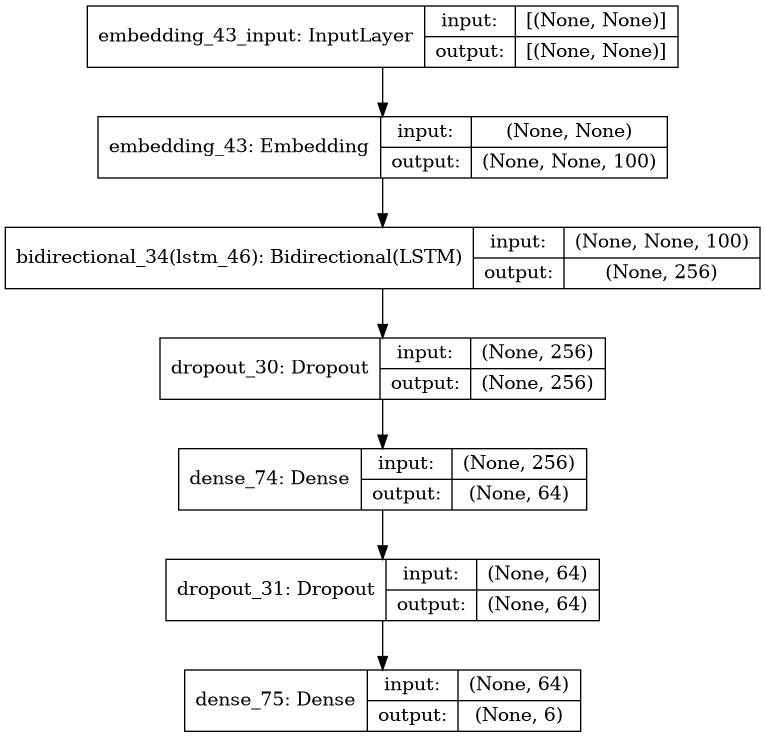

In [830]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Metrics

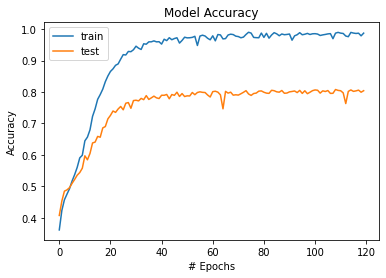

In [831]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('# Epochs')
plt.legend(['train', 'test'])
plt.show()

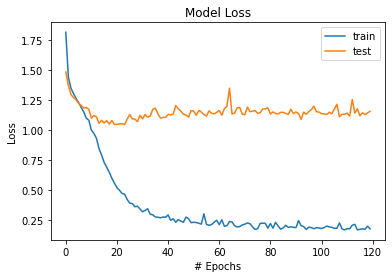

In [832]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('# Epochs')
plt.legend(['train', 'test'])
plt.show()

### Label maps

In [837]:
le = encoder.fit(_y)
labels = list(le.classes_)
labels

['G', 'NC17', 'NR', 'PG', 'PG-13', 'R']

In [838]:
class_names = dict(zip(le.classes_, le.transform(le.classes_)))
class_names

{'G': 0, 'NC17': 1, 'NR': 2, 'PG': 3, 'PG-13': 4, 'R': 5}

In [839]:
Y_pred = model.predict(X_test)

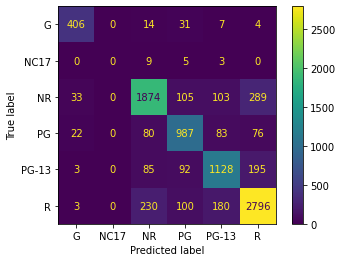

In [840]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1) )
cmd = ConfusionMatrixDisplay(cm, display_labels=list(le.classes_))
cmd.plot()

In [850]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(Y_pred, axis=1)

print(classification_report(Y_test.argmax(axis=1), y_pred_bool))


140/140 [==============================] - 4s 28ms/step
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       462
           1       0.00      0.00      0.00        17
           2       0.82      0.78      0.80      2404
           3       0.75      0.79      0.77      1248
           4       0.75      0.75      0.75      1503
           5       0.83      0.84      0.84      3309

    accuracy                           0.80      8943
   macro avg       0.67      0.67      0.67      8943
weighted avg       0.80      0.80      0.80      8943



## Demonstration